## <center> **Анализ результатов A/B-тестирования**

Компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы официального сайта компании и провела A/B-тестирование. Собранные в результате проведения эксперимента данные вы можете найти здесь.

Вам предстоит решить настоящую бизнес-задачу: проанализировать эффективность обоих вариантов посадочной страницы сразу по двум критериям: конверсии покупки и среднему чеку. На основе проведенного анализа вам будет необходимо сделать выводы и принять решение: какой из вариантов дизайна более предпочтительный.

Итак, наша фирма предлагает следующие варианты туров и их соответствующие стоимости:
* Таиланд — 100000 рублей;
* Турция — 60000 рублей;
* Мальдивы — 200000 рублей;
* Санкт-Петербург — 10000 рублей;
* Камчатка — 150000 рублей.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

Прочитаем наши данные и посмотрим на столбцы таблицы:

In [3]:
data = pd.read_csv('data/ab_data_tourist.csv')

data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


## **Задание 7.1.**

Начнем с исследования структуры наших данных. С помощью метода info() выведите информацию о типах данных и количестве непустых значений. Какой тип данных имеет столбец date?

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


## **Задание 7.2.**

Приведите столбец date к типу данных datetime. Убедитесь в равной длительности проведения тестирования для каждой из группы. Для этого сгруппируйте данные по признаку группы и определите первую и последнюю дату наблюдения для каждой из групп. 

В какой промежуток времени проводился A/B-тест?


In [42]:
# приведем столбец date к типу datetime
data['date'] = pd.to_datetime(data['date'])

# сгруппируем данные по признаку группы
data_grouped = data.groupby(['group'])['date'].agg(
    ['min','max']
)

data_grouped

,min,max
group,,
A,2021-01-02,2021-01-24
B,2021-01-02,2021-01-24


## **Задание 7.3.**

* Чему равно количество посещений сайта в группах А и B?

* Чему равно суммарное количество покупок в группах А и B?

* Чему равна сумма всех покупок в группах А и B? Ответ приведите в миллионах рублей. Например, 185.52 млн. руб.

In [43]:
data.grouped2 = data.groupby(['group']).agg(
   {'user_id':'count',
    'purchase':'sum',
    'price':'sum',  
   }).reset_index().rename(columns={'user_id':'visit_count','purchase':'purchase_sum','price':'price_sum' })

data.grouped2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,group,visit_count,purchase_sum,price_sum
0,A,147202,17723,1436260000
1,B,147276,17514,1554100000


## **Задание 7.4.**

Проверьте, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы? Если да, то сколько таких уникальных пользователей, если нет - введите в поле для ответа 0?

**Подсказка:**

*Создайте множество пользователей группы А и множество пользователей группы B. Пересеките два этих множества (операция intersection) и вычислите количество элементов в полученном множестве.*


In [44]:
set_a = set() # пустое множество для группы A
user_id_a = data[data['group']=='A']['user_id'] # отфильтруем все user_id для группы A
set_a.update(user_id_a) # добавим user_id в множество для группы A

set_b = set() # пустое множество для группы B
user_id_b = data[data['group']=='B']['user_id'] # отфильтруем все user_id для группы B
set_b.update(user_id_b) # добавим user_id в множество для группы B

user_intersection = set_a.intersection(set_b)
print(user_intersection)
print(f'qtn: {len(user_intersection)}')

{843786, 868364, 737298, 843797, 630805, 843802, 761882, 933918, 688167, 827432, 835630, 860206, 778288, 843832, 802877, 745536, 663619, 680003, 811077, 811079, 639059, 720982, 630871, 835673, 835675, 630887, 721002, 761965, 639090, 819318, 786565, 778375, 712853, 868503, 934040, 671902, 811196, 934076, 770242, 917708, 680144, 811222, 893145, 631008, 712930, 852215, 778488, 884985, 901376, 663810, 827654, 917767, 688390, 942353, 860441, 745756, 721188, 917799, 942375, 844083, 721208, 680251, 655678, 704832, 835905, 696642, 803145, 639310, 844114, 737626, 827741, 942436, 704870, 754022, 909678, 786808, 909688, 639366, 737675, 844173, 680343, 778649, 885146, 639386, 770459, 713119, 639407, 803248, 917936, 737712, 754102, 795063, 688568, 647609, 917949, 901567, 647615, 762307, 778692, 680390, 696791, 745943, 664025, 664030, 844263, 811497, 836084, 655860, 680436, 778743, 918023, 942600, 860683, 729611, 795157, 934424, 877083, 934436, 631337, 934444, 639533, 672309, 786999, 909881, 844346,

## **Исключите пользователей, оказавшихся в обеих группах**

Так как мы не можем определить, какая из версий сайта повлияла на принятие решения, исключим этих пользователей. Далее мы будем работать только с очищенными от пересечений данными.

Возможный вариант исключения пользователей:

In [45]:
# исключим пользователей, которые полпали в обе группы
update_data = data[data['user_id'].apply(lambda x: x not in user_intersection)]

Где user_intersection - множество пересечений пользователей групп А и B.

## **Задание 7.5.**

Для первичного анализа результатов A/B-тестирования нам понадобится таблица следующего вида:
 
 
Для того, чтобы получить такую таблицу, сгруппируйте данные по признаку группы. В каждой группе рассчитайте следующие показатели:
* количество посещений (количество пользователей)
* количество совершенных покупок
* сумма всех покупок в группе

В полученной сгруппированной таблице переименуйте столбцы на **count_visits, count_purchases и sum_price**.

**Подсказка:**

*Для переименования столбцов можно использовать метод rename() с параметром columns, в который передается словарь. Ключи этого словаря - старые имена столбцов, а значения - новые.*

Чему на этот раз равно количество посещений сайта в группах А и B?


In [46]:
update_data.head(3)

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0


In [47]:
from numpy.lib.shape_base import column_stack
grouped_data = update_data.groupby(['group']).agg(
    {'user_id':'count',
     'purchase':'sum',
     'price':'sum'        
    }).rename(columns={'user_id':'count_visits','purchase':'count_purchases','price':'sum_price'})

grouped_data

,count_visits,count_purchases,sum_price
group,,,
A,145307,17487,1417780000
B,145381,17290,1533010000


Приведите промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной странице, можно ли говорить о сбалансированности выборок?

#### Вывод:<br>
Количество посещений страниц обоих вариантов сопоставимо. Разница в показателях между группами составляет 0.05%. <br>
Выборки достаточно сбалансированы так как ранее мы удалили все пересечения пользователей между группами.

## **Задание 7.6.**

Добавьте в сгруппированную таблицу столбцы conversion - конверсия покупки (отношение количества покупок к количеству посещений сайта в каждой группе, выраженное в процентах) и mean_check - средний чек (отношение суммы покупок к количеству покупок в каждой группе).

* Чему равна конверсия в группах? Ответ приведите в процентах и округлите до сотых. Например, 75.12 %
* Чему равен средний чек в группах? Ответ приведите в рублях и округлите до целых. Например, 120519 рублей.

In [48]:
grouped_data['conversion'] = grouped_data['count_purchases']/grouped_data['count_visits']*100
grouped_data['mean_check'] = grouped_data['sum_price']/grouped_data['count_purchases']

grouped_data

,count_visits,count_purchases,sum_price,conversion,mean_check
group,,,,,
A,145307,17487,1417780000,12.034520,81076.228055
B,145381,17290,1533010000,11.892888,88664.545980


Приведите промежуточные выводы по таблице. По какому(им) показателю(ям) вариант А эффективнее варианта B и наоборот?

#### Вывод:<br>
На основе промежуточного анализа можно сделать вывод, что вариант B эффективнее варианта A по среднему чеку больше чем на 9%. Разница в конверсии незначительная, около 1%

## **Задание 7.7.**

Теперь давайте сравним варианты по покупательской способности туров. Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура. 

In [49]:
pivot_data = update_data.pivot_table(
    values='purchase',
    index='group',
    columns='price',
    aggfunc='sum'
)

pivot_data

price,0,10000,60000,100000,150000,200000
group,,,,,,
A,0,5182,5271,1832,3478,1724
B,0,5201,1730,5227,3438,1694


Визуализируйте полученную сводную таблицу с помощью тепловой карты с аннотацией. 
Чему равно количество проданных туров за 60000 рублей в группах?

Text(0.5, 1.0, 'Тепловая карта покупательской способности туров в группах')

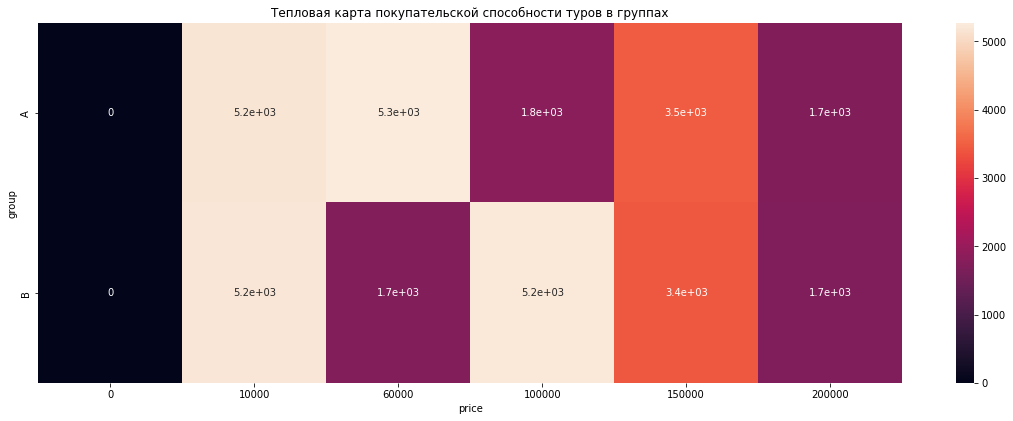

In [50]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([1,1,1,1])
sns.heatmap(data=pivot_data, annot=True)
ax.set_title('Тепловая карта покупательской способности туров в группах')

Сделайте выводы по построенной таблице. По каким турам покупательская способность участников группы А выше, чем участников группы B и наоборот?

#### Вывод:<br>
Исходя из тепловой карты, покупательская способность участников группы А выше для туров в 60000 руб.(Турция). <br>
Для туров в 100000 руб. (Тайланд) - выше покупательская способность участников группы B.

## **Задание 7.8.**

Настало время поговорить о стабилизации кумулятивных метрик во времени. Но прежде, чем перейти к кумулятивным метрикам, нам необходимо построить таблицу с ежедневными данными результатов проведения A/B-тестирования.

Сгруппируйте данные по дате и группе тестирования. В каждой группе вычислите количество посещений страницы, количество покупок и сумму покупок. 

Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок)
* Чему равна конверсия 3 января 2021 года? Ответ приведите в процентах и округлите до сотых.

* Чему равен средний чек 3 января 2021 года? Ответ приведите в рублях и округлите до целого.

In [51]:
grouped_data2 = update_data.groupby(['date','group']).agg(
    {'user_id':'count',
     'purchase':'sum',
     'price':'sum'        
    }).rename(columns={'user_id':'count_visits','purchase':'count_purchases','price':'sum_price'})

grouped_data2['conversion'] = grouped_data2['count_purchases']/grouped_data2['count_visits']*100
grouped_data2['mean_check'] = grouped_data2['sum_price']/grouped_data2['count_purchases']

grouped_data2_unstack = grouped_data2.unstack()

print('Конверсия 3 января 2020 года для группы A:')
display(round(grouped_data2_unstack['conversion']['A']['2021-01-03'],2))

print('Конверсия 3 января 2020 года для группы B:')
display(round(grouped_data2_unstack['conversion']['B']['2021-01-03'],2))

print('Средний чек на 3 января 2020 года для группы A:')
display(round(grouped_data2_unstack['mean_check']['A']['2021-01-03']))

print('Средний чек на 3 января 2020 года для группы B:')
display(round(grouped_data2_unstack['mean_check']['B']['2021-01-03']))


Конверсия 3 января 2020 года для группы A:


11.34

Конверсия 3 января 2020 года для группы B:


11.39

Средний чек на 3 января 2020 года для группы A:


82888

Средний чек на 3 января 2020 года для группы B:


87480

## **Задание 7.9.** 

Добавьте в таблицу с ежедневными показателями кумулятивные признаки:
* кумулятивное количество посещений страницы
* кумулятивное количество покупок
* кумулятивную сумму покупок

Не забудьте при расчете кумулятивной суммы сгруппировать данные по группам. 

Вычислите кумулятивную конверсию и кумулятивный средний чек на основе полученных кумулятивных показателей. 

* Какая **кумулятивная** конверсия была в группе B на 20 января? Ответ приведите в процентах, округлив до сотых.
* Какой **кумулятивный** средний чек был в группе А на 12 января 2021 года? Ответ приведите в рублях, округлив до целых.

In [52]:
grouped_data3 = grouped_data2.groupby(['group']).agg(
    {'count_visits':'cumsum',
     'count_purchases':'cumsum',
     'sum_price':'cumsum'
    }).rename(columns={
      'count_visits':'cum_visits',
      'count_purchases':'cum_purchases',
      'sum_price':'cum_price'
      })

grouped_data3['cum_conversion'] = grouped_data3['cum_purchases']/grouped_data3['cum_visits']*100
grouped_data3['cum_mean_check'] = grouped_data3['cum_price']/grouped_data3['cum_purchases']

display(grouped_data3.head(10))

cum_visits  cum_purchases  cum_price  cum_conversion  \
date       group                                                         
2021-01-02 A            2854            359   29410000       12.578837   
           B            2861            345   29660000       12.058721   
2021-01-03 A            9450           1107   91410000       11.714286   
           B            9480           1099   95620000       11.592827   
2021-01-04 A           16016           1906  155660000       11.900599   
           B           16016           1863  163650000       11.632118   
2021-01-05 A           22449           2696  220210000       12.009444   
           B           22527           2612  227200000       11.594975   
2021-01-06 A           29055           3460  283620000       11.908449   
           B           29278           3450  302220000       11.783592   

                  cum_mean_check  
date       group                  
2021-01-02 A        81922.005571  
           B        85971.014493  
2021-01-03 A        82574.525745  
           B        87006.369427  
2021-01-04 A        81668.415530  
           B        87842.190016  
2021-01-05 A        81680.267062  
           B        86983.154671  
2021-01-06 A        81971.098266  
           B        87600.000000

Постройте кумулятивные графики конверсии и среднего чека в каждой группе по дням. Сделайте выводы. Можно ли назвать A/B-тест завершенным - стабилизировались ли значения метрик во времени? Как соотносятся кумулятивные показатели в каждой группе?

Text(0.5, 1.0, 'Кумулятивный график конверсии в каждой группе по дням')

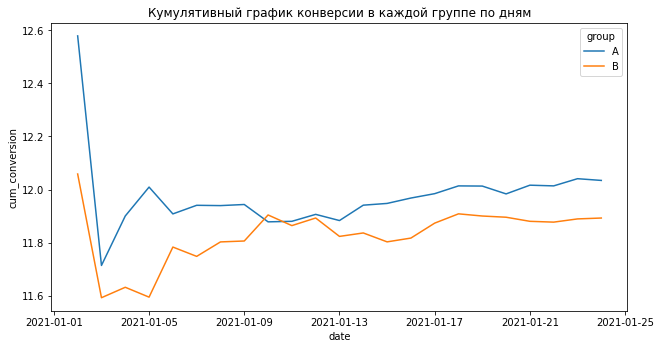

In [53]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_axes([1,1,1,1])
sns.lineplot(
    data=grouped_data3,
    x='date',
    y='cum_conversion',
    hue='group',
    ax=ax1 )
ax1.set_title('Кумулятивный график конверсии в каждой группе по дням')

Text(0.5, 1.0, 'Кумулятивный график среднего чека в каждой группе по дням')

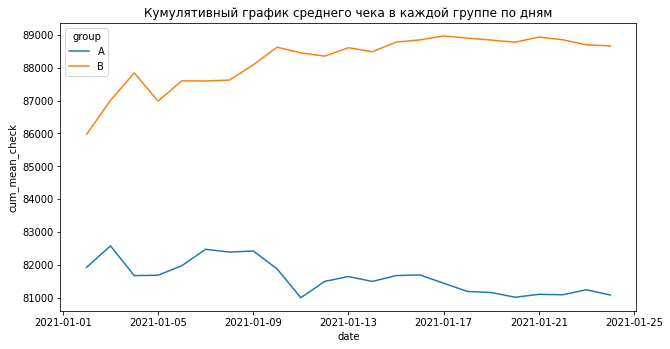

In [54]:
fig = plt.figure(figsize=(8,4))

ax2 = fig.add_axes([1,1,1,1])
sns.lineplot(
    data=grouped_data3,
    x='date',
    y='cum_mean_check',
    hue='group',
    ax=ax2 )
ax2.set_title('Кумулятивный график среднего чека в каждой группе по дням')

#### Вывод:<br>
В целом значения метрик стабилизировались во времени, A/B-тест можно назвать завершенным.
<br>
До 10 января конверсия была нестабильной, затем ее показатели постпенно стабилизировались в обеих группах. Кумулятивные показатели конверсии в группах после стабилизации очень близки, в группе A немного выше.
<br> 
Показатели среднего чека выравнились после 11 января 2021г. Кумулятивные показатели среднего чека в группе B после стабилизации выше соответвующих показателей в группе A.

## **Задание 7.10.**

Настало время переходить к проверке статистической значимости разницы между метриками в группах. Начнем с конверсии.

Какой тест вы примените для проверки гипотезы о равенстве конверсий в группах?

Проведите тестирование при следующих нулевой и альтернативной гипотезе:
* $H_0$: Конверсии в группах А и B равны; 
* $H_1$: Конверсия в группе А больше чем конверсия в группе B;

Вычислите p-value вашего теста для конверсий в группах А и B. Сравните полученное значение p-value с уровнем значимости $\alpha$=0.05. 

In [55]:
grouped_data

,count_visits,count_purchases,sum_price,conversion,mean_check
group,,,,,
A,145307,17487,1417780000,12.034520,81076.228055
B,145381,17290,1533010000,11.892888,88664.545980


In [56]:
# Для проверки статистической значимости разницы между конверсиями в группах воспользуемся z-критерием для пропорций
from statsmodels.stats.proportion import proportions_ztest

# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах A И B равны'
H1 = 'Конверсия в группе A выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=grouped_data['count_purchases'], # число успехов
    nobs=grouped_data['count_visits'], # общее число наблюдений
    alternative='larger' # альтернативная правосторонняя гипотеза
)

print(f'p-value: {round(p_value, 2)}')

# сравним полученное p-value с уровнем значимости
if (p_value < alpha):
  print(f'Отвергаем нулевую гипотезу. {H0}')
  print(f'Альтернативная гипотеза. H1: {H1}')
else:
  print(f'Принимаем нулевую гипотезу H0. {H0}')

p-value: 0.12
Принимаем нулевую гипотезу H0. Конверсии в группах A И B равны


Приведите свои выводы по результатам проведенного статистического теста. Есть ли статистическая разница между конверсиями в группах А и B?

#### Вывод:<br>
По результату Z-теста мы получили значение статистической значимости p-value = 0.21. Это значение меньше уровня значимости alpha = 0.05. Следовательно принимаем нулевую гипотезу H0: конверсии в группах A и B равны, между ними нет статистической разницы.

## **Задание 7.11.**
Убедитесь в своих рассуждениях, построив 95%-ый доверительный интервал для конверсий и разницы между ними. Используйте $z_{крит}$ в своих расчетах

Укажите нижнюю и верхнюю границы доверительных интервалов. Границы приведите в процентах и округлите до 2 знака после запятой. Например: нижняя граница 89.24%, верхняя граница 91.25%.

In [57]:
grouped_data['conversion'] = grouped_data['conversion']/100
grouped_data

,count_visits,count_purchases,sum_price,conversion,mean_check
group,,,,,
A,145307,17487,1417780000,0.120345,81076.228055
B,145381,17290,1533010000,0.118929,88664.545980


In [58]:
# размер выборок > 30 поэтому используем Z критическое
# импортируем функцию norm.ppf() для нахождения Z-критического
from scipy.stats import norm

# создадим функцию для построения доверительного интервала конверсии
def proportions_conf_interval(n, xp, gamma=0.95):
  alpha = 1 - gamma # уровень значимости
  z_crit = -norm.ppf(alpha/2) # z критическое
  eps = z_crit * (xp * (1 - xp) / n) ** 0.5 # погрешность
  lower_bound = xp - eps # левая (нижняя) граница
  upper_bound = xp + eps # правая (верхняя) граница
  # доверительный интервал
  return round(lower_bound*100, 2), round(upper_bound*100, 2)

# создадим функцию для построения доверительного интервала разницы конверсий
def diff_proportions_conf_interval(n, xp, gamma=0.95):
  alpha = 1 - gamma # уровень значимости
  diff = xp[1] - xp[0] # выборочная разница конверсий групп A и B
  z_crit = -norm.ppf(alpha/2) # z критическое
  eps = z_crit * (xp[0] * (1 - xp[0]) / n[0] + xp[1] * (1 - xp[1]) / n[1]) ** 0.5 # погрешность
  lower_bound = diff - eps # левая (нижняя) граница
  upper_bound = diff + eps # правая (верхняя) граница
  # доверительный интервал
  return round(lower_bound * 100, 2), round(upper_bound * 100, 2) 

# размер выборок групп A и B 
n = [grouped_data['count_visits']['A'],grouped_data['count_visits']['B']] 
# выборочная пропорция групп A и B
xp = [grouped_data['conversion']['A'],grouped_data['conversion']['B']]

# строим доверительный интервал для конверсий групп A и B
conf_interval_a = proportions_conf_interval(n[0], xp[0], gamma=0.95)
conf_interval_b = proportions_conf_interval(n[1], xp[1], gamma=0.95)

# строим доверительный интервал для разницы конверсий групп A и B
diff_inverval = diff_proportions_conf_interval(n, xp, gamma=0.95)

print(f'Доверительный интервал для конверсии группы A: {conf_interval_a}')
print(f'Доверительный интервал для конверсии группы B: {conf_interval_b}')
print(f'Доверительный интервал для разности конверсий: {diff_inverval}')

Доверительный интервал для конверсии группы A: (11.87, 12.2)
Доверительный интервал для конверсии группы B: (11.73, 12.06)
Доверительный интервал для разности конверсий: (-0.38, 0.09)


Проинтерпретируйте построенные доверительные интервалы для конверсий в группах. Есть ли перекрытие между доверительными интервалами для групп? Есть ли статистическая разница между конверсиями в группах А и B?

#### Вывод:<br>
После построения доверительного интервала разности пропорций видим, что левая граница интервала отрицательная, а правая - положительная. Т.е истиная разница в конверсии может быть как положительная, так и отрицательная. Это значит, что группы A и B равнозначны по метрике конверсии.

## **Задание 7.12.**

Ранее мы построили таблицу с ежедневными показателями. Теперь она нам снова понадобится, так как нас интересует ежедневный средний чек.

Проверьте гипотезу о нормальности распределения ежедневного среднего чека в каждой из групп тестирования. 

* Какой тест вы примените  для проверки гипотезы о нормальности распределения ежедневного среднего чека?
* Как будут звучать нулевая и альтернативная гипотезы?
* Каковы результаты статистического теста с уровнем значимости $\alpha$ =0.05?

In [59]:
grouped_data2
grouped_data4 = grouped_data2.reset_index()

grouped_data_a = grouped_data4[grouped_data4['group'] == 'A']
grouped_data_b = grouped_data4[grouped_data4['group'] == 'B']

display(grouped_data_a.head(3))
display(grouped_data_b.head(3))

,date,group,count_visits,count_purchases,sum_price,conversion,mean_check
0,2021-01-02,A,2854,359,29410000,12.578837,81922.005571
2,2021-01-03,A,6596,748,62000000,11.340206,82887.700535
4,2021-01-04,A,6566,799,64250000,12.168748,80413.016270


,date,group,count_visits,count_purchases,sum_price,conversion,mean_check
1,2021-01-02,B,2861,345,29660000,12.058721,85971.014493
3,2021-01-03,B,6619,754,65960000,11.391449,87480.106101
5,2021-01-04,B,6536,764,68030000,11.689106,89044.502618


In [60]:
# Применим тест Шапиро-Уилка
from scipy.stats import shapiro
# Нулевая и альтернативная гипотезы
H0 = 'Данные в обеих группах рапределены нормально'
H1 = 'Данные в обеих группах не распределены нормально (отвергаем нулевую гипотезу)'
alpha = 0.05 # уровень значимости

shapiro_a = shapiro(grouped_data_a['mean_check'])
shapiro_b = shapiro(grouped_data_b['mean_check'])
print(f'p-value для группы A: {round(shapiro_a.pvalue,2)}')
print(f'p-value для группы B: {round(shapiro_b.pvalue,2)}')

if shapiro_a.pvalue < alpha and shapiro_b.pvalue < alpha:
  print(f'Для группы A и B. {H1}')
else:
  print(f'Для группы A и B. {H0}')  

p-value для группы A: 0.25
p-value для группы B: 0.09
Для группы A и B. Данные в обеих группах рапределены нормально


## **Задание 7.13.**
Настало время сравнить варианты дизайна страницы по метрике среднего чека. 

Какой тест вы примените для проверки гипотезы о равенстве средних чеков по дням в группах?

Проведите тестирование при следующих нулевой и альтернативной гипотезе:
* $H_0$: Ежедневные средние чеки в группах А и B равны; 
* $H_1$: Ежедневный средний чек в группе А меньше чем в группе B;

Вычислите p-value вашего теста для ежедневного среднего чека в группах А и B. Сравните полученное значение p-value с уровнем значимости $\alpha$ =0.05. 

In [61]:
# Так как данные в группах распределены нормально будем применять T-тест для поверки гипотезы
from scipy.stats import ttest_ind
# Нулевая и альтернативная гипотезы
H0 = 'Ежедневные средние чеки в группах A и B равны'
H1 = 'Ежедневный средний чек в группе A меньше чем в группе B'
# уровень значимости
alpha = 0.05
# вычисляем результат теста для выборок
results = ttest_ind(
    a=grouped_data_a['mean_check'],
    b=grouped_data_b['mean_check'],
    alternative='less'
)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
  print(f'Отвергаем нулевую гипотезу. {H0}')
  print(f'Альтернативная гипотеза. {H1}')
else:
  print(f'Принимаем нулевую гипотезу. {H0}')  

p-value: 1.1261794674808954e-12
Отвергаем нулевую гипотезу. Ежедневные средние чеки в группах A и B равны
Альтернативная гипотеза. Ежедневный средний чек в группе A меньше чем в группе B


 Приведите свои выводы по проведенному статистическому тесту. Есть ли статистическая разница между ежедневными средними чеками в группах А и B?

#### Вывод:<br>
По результату статистического теста мы видим, что ежедневный средний чек в группе B больше, чем в группе A. Следовательно новый вариант посадочной страницы позволяет продавать более дорогие туры.

## **Задание 7.14.**

Постройте 95%-ый доверительный интервал для среднего чека в каждой группе. Так как выборка средних чеков небольшая, используйте  $t_{крит}$ в своих расчетах.

Укажите нижнюю границу доверительного интервала для истинного среднего чека каждой из групп. Ответ приведите в процентах и округлите до целого.

In [62]:
# импортируем функцию norm.ppf() для нахождения T-критического
from scipy.stats import t

# создадим функцию для построения доверительного интервала для среднего чека
def proportions_conf_interval(n, x_mean, x_std, gamma=0.95):
  k = n - 1 # число степеней свободы
  alpha = 1 - gamma # уровень значимости
  t_crit = -t.ppf(alpha/2, k) # z критическое
  eps = t_crit * x_std / (n ** 0.5) # погрешность
  lower_bound = x_mean - eps # левая (нижняя) граница
  upper_bound = x_mean + eps # правая (верхняя) граница
  # доверительный интервал
  return round(lower_bound), round(upper_bound) 

# создадим функцию для построения доверительного интервала разницы конверсий
def diff_proportions_conf_interval(n, xp, gamma=0.95):
  alpha = 1 - gamma # уровень значимости
  diff = xp[1] - xp[0] # выборочная разница конверсий групп A и B
  z_crit = -norm.ppf(alpha/2) # z критическое
  eps = z_crit * (xp[0] * (1 - xp[0]) / n[0] + xp[1] * (1 - xp[1]) / n[1]) ** 0.5 # погрешность
  lower_bound = diff - eps # левая (нижняя) граница
  upper_bound = diff + eps # правая (верхняя) граница
  # доверительный интервал
  return round(lower_bound * 100, 2), round(upper_bound * 100, 2)  

# размер выборок групп A и B 
n = [grouped_data_a['mean_check'].count(),grouped_data_b['mean_check'].count()] 
# выборочное среднее групп A и B
x_mean = [grouped_data_a['mean_check'].mean(),grouped_data_b['mean_check'].mean()]
# выборочное стандартное отклонение для групп A и B
x_std = [grouped_data_a['mean_check'].std(),grouped_data_b['mean_check'].std()]

# строим доверительный интервал среднего чека для групп A и B
conf_interval_a = proportions_conf_interval(n[0], x_mean[0], x_std[0], gamma=0.95)
conf_interval_b = proportions_conf_interval(n[1], x_mean[1], x_std[1], gamma=0.95)

# строим доверительный интервал для разницы конверсий групп A и B
#diff_inverval = diff_proportions_conf_interval(n, xp, gamma=0.95)

print(f'Доверительный интервал среднего чека для  группы A: {conf_interval_a}')
print(f'Доверительный интервал среднего чека для группы B: {conf_interval_b}')
#print(f'Доверительный интервал для разности конверсий: {diff_inverval}')

Доверительный интервал среднего чека для  группы A: (79630, 82308)
Доверительный интервал среднего чека для группы B: (87626, 89526)


Проинтерпретируйте построенные доверительные интервалы для ежедневных средних чеков в группах. Есть ли между ними пересечения?

#### Вывод:<br>
Из построенных доверительных интервалов для среднего чека мы видим, что истиный средний чек для группы B выше чем истиный средний чек для группы A. Пересечений между доверительными интервалами групп A и B нет. Это значит что истинное значение среднего чека в обеих группах не совпадает.

## **Сделайте общий вывод по результатам A/B-теста**
### Общий вывод:<br>
В результате анализа A/B тестирования двух вариантов посадочных страниц, мы можем сделать вывод:
1) По метрике конверсии обе группы A и B, а следовательно и оба варианта посадочных страниц равнозначны с надежностью 95%. Это следует из проведенного z-теста и построенных доверительных интервалов.
2) По метрике среднего чека группа B (новый вариант посадочной страницы) позволяет получить бОльший средний чек по сравнению с группой A (старый вариант посадочной страницы) с надежностью 95%. Это следует из проведенного t-теста и построения доверительных интервалов групп.